In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	657.2605

Best Fitness:	296.2255
Solution:	200.0000
Diff:		96.2255

[0:08:08][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1999.8310

Best Fitness:	755.8652
Solution:	200.0000
Diff:		555.8652

[0:15:20][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	566.3771

Best Fitness:	290.9914
Solution:	200.0000
Diff:		90.9914

[0:22:00][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1268.0543

Best Fitness:	461.1147
Solution:	200.0000
Diff:		261.1147

[0:28:54][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1086.5180

Best Fitness:	328.0915
Solution:	200.0000
Diff:		128.0915

[0:35:53][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	763.4726

Best Fitness:	348.9507
Solution:	200.0000
Diff:		148.9507

[0:42:19][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	763.5765

Best Fitness:	292.7207
Solution:	200.0000
Diff:		92.7207

[0:48:54][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1344.3734

Best Fitness:	434.5989
Solution:	200.0000
Diff:		234.5989

[0:55:04][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1269.2995

Best Fitness:	309.3923
Solution:	200.0000
Diff:		109.3923

[1:01:40][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2104.7570

Best Fitness:	582.8104
Solution:	200.0000
Diff:		382.8104

[1:07:44][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	738.1788

Best Fitness:	357.8773
Solution:	200.0000
Diff:		157.8773

[1:14:01][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1005.5516

Best Fitness:	436.2825
Solution:	200.0000
Diff:		236.2825

[1:20:16][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1127.7330

Best Fitness:	451.9200
Solution:	200.0000
Diff:		251.9200

[1:26:30][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	517.8664

Best Fitness:	267.8037
Solution:	200.0000
Diff:		67.8037

[1:32:53][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	824.0752

Best Fitness:	400.6396
Solution:	200.0000
Diff:		200.6396

[1:38:49][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	638.0325

Best Fitness:	278.1039
Solution:	200.0000
Diff:		78.1039

[1:45:08][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1188.6001

Best Fitness:	467.4821
Solution:	200.0000
Diff:		267.4821

[1:51:05][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	714.1253

Best Fitness:	362.2317
Solution:	200.0000
Diff:		162.2317

[1:56:45][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1067.9600

Best Fitness:	455.4182
Solution:	200.0000
Diff:		255.4182

[2:02:36][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	964.7883

Best Fitness:	334.9393
Solution:	200.0000
Diff:		134.9393

[2:08:31][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1187.0120

Best Fitness:	476.1506
Solution:	200.0000
Diff:		276.1506

[2:14:19][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	805.9474

Best Fitness:	330.4815
Solution:	200.0000
Diff:		130.4815

[2:20:04][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1137.9846

Best Fitness:	381.5399
Solution:	200.0000
Diff:		181.5399

[2:25:41][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	691.3909

Best Fitness:	332.2524
Solution:	200.0000
Diff:		132.2524

[2:31:03][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1276.5698

Best Fitness:	381.9405
Solution:	200.0000
Diff:		181.9405

[2:36:21][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1432.7209

Best Fitness:	502.9813
Solution:	200.0000
Diff:		302.9813

[2:41:23][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	702.1426

Best Fitness:	309.6984
Solution:	200.0000
Diff:		109.6984

[2:46:25][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1244.7935

Best Fitness:	363.9131
Solution:	200.0000
Diff:		163.9131

[2:51:33][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1575.4817

Best Fitness:	522.7880
Solution:	200.0000
Diff:		322.7880

[2:56:32][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2313.7662

Best Fitness:	735.9373
Solution:	200.0000
Diff:		535.9373

[3:01:45][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1688.4457

Best Fitness:	524.5373
Solution:	200.0000
Diff:		324.5373

[3:07:00][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	920.5509

Best Fitness:	414.8889
Solution:	200.0000
Diff:		214.8889

[3:12:05][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	619.7294

Best Fitness:	309.0611
Solution:	200.0000
Diff:		109.0611

[3:17:04][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1121.5791

Best Fitness:	425.1173
Solution:	200.0000
Diff:		225.1173

[3:21:57][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.2574

Best Fitness:	359.5050
Solution:	200.0000
Diff:		159.5050

[3:26:38][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	868.6066

Best Fitness:	273.2888
Solution:	200.0000
Diff:		73.2888

[3:31:19][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1102.2599

Best Fitness:	381.9084
Solution:	200.0000
Diff:		181.9084

[3:36:02][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2709.3864

Best Fitness:	955.4617
Solution:	200.0000
Diff:		755.4617

[3:40:44][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1436.7804

Best Fitness:	578.2704
Solution:	200.0000
Diff:		378.2704

[3:45:27][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	721.6508

Best Fitness:	330.9050
Solution:	200.0000
Diff:		130.9050

[3:50:16][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	922.1625

Best Fitness:	362.5808
Solution:	200.0000
Diff:		162.5808

[3:55:01][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	981.7070

Best Fitness:	427.5710
Solution:	200.0000
Diff:		227.5710

[3:59:57][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	807.3575

Best Fitness:	268.4665
Solution:	200.0000
Diff:		68.4665

[4:04:29][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	622.1006

Best Fitness:	294.5964
Solution:	200.0000
Diff:		94.5964

[4:08:56][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.2310

Best Fitness:	299.7970
Solution:	200.0000
Diff:		99.7970

[4:13:37][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1268.1903

Best Fitness:	431.6840
Solution:	200.0000
Diff:		231.6840

[4:18:25][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	753.0710

Best Fitness:	326.9179
Solution:	200.0000
Diff:		126.9179

[4:23:08][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1713.0756

Best Fitness:	392.6954
Solution:	200.0000
Diff:		192.6954

[4:27:53][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	576.9291

Best Fitness:	291.7678
Solution:	200.0000
Diff:		91.7678

[4:32:50][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1989.7010

Best Fitness:	707.5448
Solution:	200.0000
Diff:		507.5448

[4:37:38][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	917.3006

Best Fitness:	366.8328
Solution:	200.0000
Diff:		166.8328

[4:42:58][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:42:58

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,1184.144501,914.634784,520.906069,1150.968102,727.554205,914.891399,672.498475,975.327284,1022.901121,711.610411,...,323.955116,1304.782014,1695.601615,641.939535,1007.404731,765.537131,1222.001856,548.497795,1415.134337,50
194,1184.144501,914.634784,520.906069,1150.968102,727.554205,914.891399,672.498475,975.327284,1022.901121,711.610411,...,323.955116,1304.782014,1455.201320,641.939535,1007.404731,765.537131,512.531270,548.497795,1415.134337,50
195,1184.144501,513.502077,520.906069,860.975960,727.554205,903.889086,672.498475,882.472431,1022.901121,711.610411,...,323.955116,1304.782014,1455.201320,641.939535,1007.404731,765.537131,512.531270,548.497795,492.812186,50
196,1184.144501,513.502077,520.906069,860.975960,727.554205,903.889086,290.846012,882.472431,1022.901121,711.610411,...,323.955116,1304.782014,1455.201320,641.939535,1007.404731,765.537131,512.531270,548.497795,492.812186,50
197,1184.144501,513.502077,520.906069,860.975960,727.554205,903.889086,290.846012,447.665267,470.303008,711.610411,...,323.955116,1304.782014,1244.118201,641.939535,798.967966,765.537131,512.531270,548.497795,492.812186,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 96.22545090714385

Best error for run 1: 555.8651714712475

Best error for run 2: 90.99135430678518

Best error for run 3: 261.114741157609

Best error for run 4: 128.09152585922493

Best error for run 5: 148.95072938746466

Best error for run 6: 92.72068456331704

Best error for run 7: 234.59892577251162

Best error for run 8: 109.39227015697935

Best error for run 9: 382.81040948941734

Best error for run 10: 157.87731524122142

Best error for run 11: 236.28252055927425

Best error for run 12: 251.91995431682085

Best error for run 13: 67.80372330991509

Best error for run 14: 200.6396361278587

Best error for run 15: 78.10392750481583

Best error for run 16: 267.4820902187738

Best error for run 17: 162.23173633369822

Best error for run 18: 255.41816661662523

Best error for run 19: 134.93930971824824

Best error for run 20: 276.15056897454247

Best error for run 21: 130.48149246251802

Best error for run 22: 181.5399101184903

Best error for run 23: 132.25236854130816

Best error for run 24: 181.9405364344442

Best error for run 25: 302.98134300751127

Best error for run 26: 109.6983514391568

Best error for run 27: 163.91308411114034

Best error for run 28: 322.78800176181016

Best error for run 29: 535.937287964157

Best error for run 30: 324.5373248474807

Best error for run 31: 214.88888973845553

Best error for run 32: 109.06114843595992

Best error for run 33: 225.11730579531525

Best error for run 34: 159.50503793780933

Best error for run 35: 73.2888472493093

Best error for run 36: 181.90838170251726

Best error for run 37: 755.461723337416

Best error for run 38: 378.2704144710249

Best error for run 39: 130.90504169476924

Best error for run 40: 162.58084237227376

Best error for run 41: 227.57103558014035

Best error for run 42: 68.46647302947389

Best error for run 43: 94.5963937285282

Best error for run 44: 99.79699201605206

Best error for run 45: 231.68403433631306

Best error for run 46: 126.91789218213671

Best error for run 47: 192.69536612499394

Best error for run 48: 91.76784904858692

Best error for run 49: 507.54484071649176

Best error for run 50: 166.8327854821129

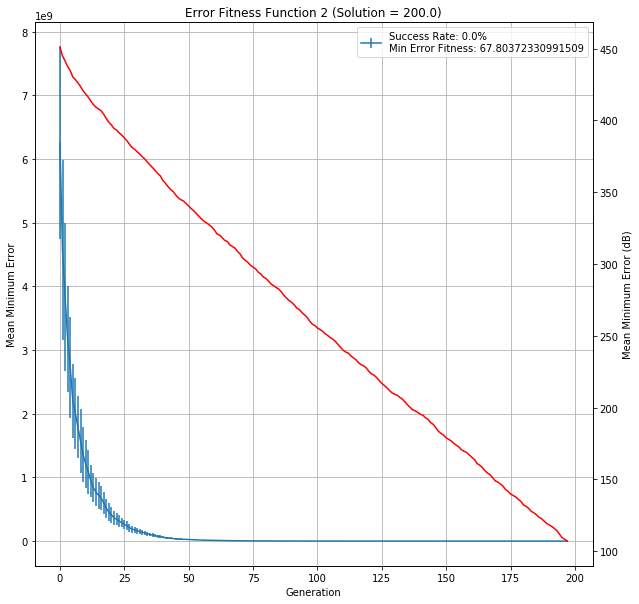

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.6,96.225451,555.865171,90.991354,261.114741,128.091526,148.950729,...,99.796992,231.684034,126.917892,192.695366,91.767849,507.544841,166.832785,211.265514,4:42:58,60000
